In [90]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [91]:
!curl -O https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

In [92]:
df = pd.read_csv('moore.csv')
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

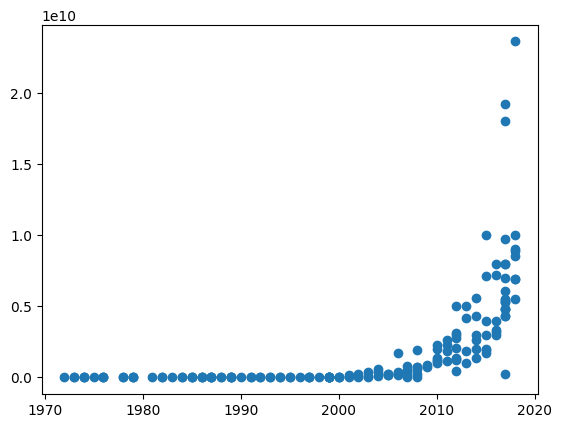

In [93]:
plt.scatter(X, Y)
plt.show()

In [94]:
Y = np.log(Y)

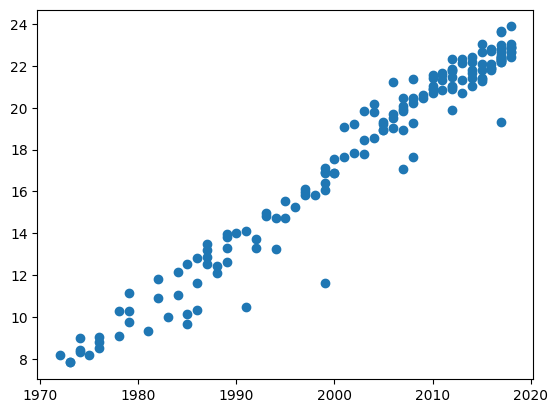

In [95]:
plt.scatter(X, Y)
plt.show()

In [96]:
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X - mx)/sx
Y = (Y - my)/sy

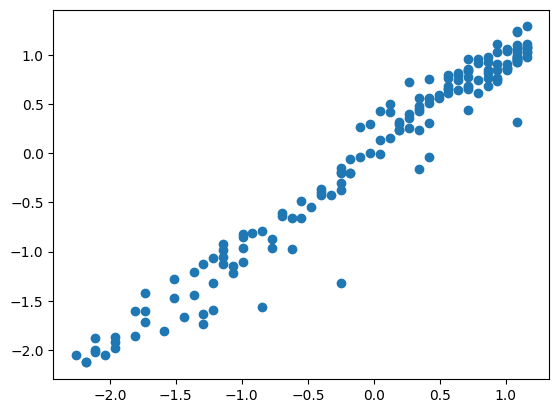

In [97]:
plt.scatter(X, Y)
plt.show()

In [98]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)
inputs = torch.from_numpy(X.reshape(-1, 1))
targets = torch.from_numpy(Y.reshape(-1, 1))

In [99]:
model = nn.Linear(1, 1)

In [100]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.7)

In [101]:
n_epochs = 100
losses = np.zeros(n_epochs)

for epoch in range(n_epochs):
    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    loss.backward()
    optimizer.step()

    losses[epoch] = loss.item()
    epoch_str = str(epoch).rjust(len(str(n_epochs)), " ")
    print(f"Epoch {epoch_str}/{n_epochs}, Loss : {loss.item():.4f}")

Epoch   0/100, Loss : 1.1115
Epoch   1/100, Loss : 1.0690
Epoch   2/100, Loss : 0.9997
Epoch   3/100, Loss : 0.9155
Epoch   4/100, Loss : 0.8253
Epoch   5/100, Loss : 0.7352
Epoch   6/100, Loss : 0.6490
Epoch   7/100, Loss : 0.5692
Epoch   8/100, Loss : 0.4967
Epoch   9/100, Loss : 0.4320
Epoch  10/100, Loss : 0.3750
Epoch  11/100, Loss : 0.3252
Epoch  12/100, Loss : 0.2821
Epoch  13/100, Loss : 0.2450
Epoch  14/100, Loss : 0.2132
Epoch  15/100, Loss : 0.1861
Epoch  16/100, Loss : 0.1630
Epoch  17/100, Loss : 0.1435
Epoch  18/100, Loss : 0.1269
Epoch  19/100, Loss : 0.1130
Epoch  20/100, Loss : 0.1012
Epoch  21/100, Loss : 0.0913
Epoch  22/100, Loss : 0.0829
Epoch  23/100, Loss : 0.0759
Epoch  24/100, Loss : 0.0700
Epoch  25/100, Loss : 0.0651
Epoch  26/100, Loss : 0.0609
Epoch  27/100, Loss : 0.0574
Epoch  28/100, Loss : 0.0545
Epoch  29/100, Loss : 0.0521
Epoch  30/100, Loss : 0.0500
Epoch  31/100, Loss : 0.0483
Epoch  32/100, Loss : 0.0469
Epoch  33/100, Loss : 0.0456
Epoch  34/100,

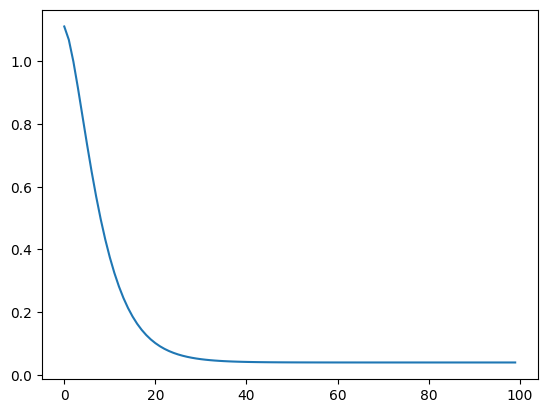

In [102]:
plt.plot(losses)
plt.show()

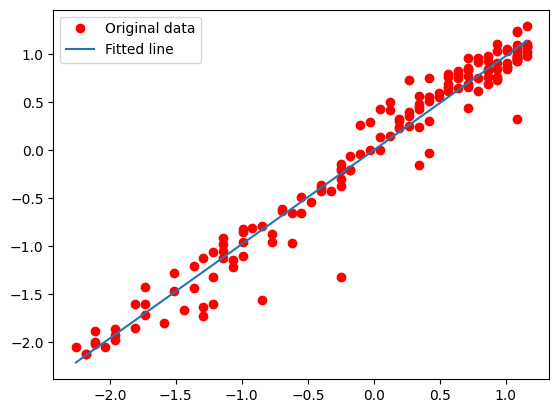

In [103]:
predicted = model(inputs).detach().numpy()
plt.plot(X, Y, 'ro', label = 'Original data')
plt.plot(X, predicted, label = 'Fitted line')
plt.legend()
plt.show()

In [105]:
w = model.weight.data.numpy()
print(w)

[[0.980021]]


In [106]:
a = w[0, 0] * sy / sx
print(a)

0.3423470896350576


In [114]:
print("Time to double : ", np.log(2) / a)

Time to double :  2.0246913192656053
